In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import cv2
from google.colab.patches import cv2_imshow

import pandas as pd
import numpy as np

import os
import time
import warnings
warnings.filterwarnings('ignore')


from tqdm import tqdm

In [3]:
path_pickle = '/content/drive/MyDrive/project3/data/traindata/read_image.pkl'

df = pd.read_pickle(path_pickle)
df.head()


,file_path,type,middle_class,small_class,food_class,group_number,crop_area
0,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,1,NaN
1,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,2,NaN
2,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,3,NaN
3,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,4,NaN
4,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,5,NaN


In [4]:
def image_to_array(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        return image
    else:
        return None



In [41]:


temp = df.iloc[:100, :]

temp['list'] = None
temp['shape'] = None

for index, row in tqdm(temp.iterrows(), total=temp.shape[0]):
    image_path = row['file_path']
    image_array = image_to_array(image_path)

    if image_array is not None:
        temp.at[index, 'list'] = image_array.flatten()
        temp.at[index, 'shape'] = image_array.shape
    else:
        temp.at[index, 'list'] = None
        temp.at[index, 'shape'] = None

100%|██████████| 100/100 [00:01<00:00, 69.30it/s]


array([[[148, 152, 153],
        [150, 154, 155],
        [151, 154, 158],
        ...,
        [239, 236, 232],
        [236, 233, 229],
        [235, 232, 228]],

       [[150, 154, 155],
        [151, 155, 156],
        [151, 155, 156],
        ...,
        [238, 235, 231],
        [236, 233, 229],
        [235, 232, 228]],

       [[152, 158, 157],
        [151, 157, 156],
        [150, 155, 156],
        ...,
        [237, 234, 230],
        [236, 233, 229],
        [235, 232, 228]],

       ...,

       [[190, 195, 194],
        [190, 195, 194],
        [189, 194, 193],
        ...,
        [110, 111,  19],
        [110, 111,  19],
        [107, 108,  16]],

       [[189, 194, 193],
        [189, 194, 193],
        [190, 195, 194],
        ...,
        [111, 112,  20],
        [110, 111,  19],
        [109, 108,  17]],

       [[188, 193, 192],
        [189, 194, 193],
        [190, 195, 194],
        ...,
        [111, 112,  20],
        [110, 111,  19],
        [110, 109,  18]]], dtype=uint8)
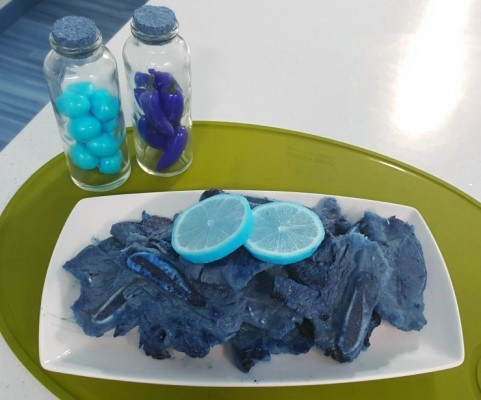

In [42]:
temp['list'][0].reshape(temp['shape'][0])

In [43]:
temp.to_pickle('image_array.pkl')

In [44]:
loaded_temp = pd.read_pickle('image_array.pkl')
loaded_temp

,file_path,type,middle_class,small_class,food_class,group_number,crop_area,list,shape
0,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,1,NaN,"[148, 152, 153, 150, 154, 155, 151, 154, 158, ...","(400, 481, 3)"
1,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,2,NaN,"[178, 209, 234, 177, 211, 235, 174, 212, 236, ...","(400, 600, 3)"
2,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,3,NaN,"[94, 101, 98, 95, 102, 99, 96, 103, 100, 95, 1...","(493, 743, 3)"
3,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,4,NaN,"[24, 21, 17, 23, 20, 16, 22, 19, 15, 22, 19, 1...","(634, 945, 3)"
4,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,5,NaN,"[197, 197, 197, 212, 212, 212, 197, 197, 197, ...","(375, 500, 3)"
...,...,...,...,...,...,...,...,...,...
95,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,96,NaN,"[21, 33, 73, 20, 32, 72, 20, 32, 72, 18, 30, 7...","(412, 550, 3)"
96,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,97,NaN,"[245, 245, 245, 245, 245, 245, 245, 245, 245, ...","(747, 630, 3)"
97,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,98,NaN,"[29, 34, 35, 29, 34, 35, 29, 34, 37, 29, 34, 3...","(400, 600, 3)"
98,/content/drive/MyDrive/project3/data/traindata...,raw,구이,갈비구이,구이/갈비구이,99,NaN,"[202, 212, 206, 206, 216, 210, 211, 221, 215, ...","(400, 604, 3)"


file_path : /content/drive/MyDrive/project3/data/traindata/raw_image/구이/갈비구이/Img_000_0438.jpg
type : raw
middle_class : 구이
small_class : 갈비구이
food_class : 구이/갈비구이
group_number : 2
crop_area : nan
list : [178 209 234 ...  25  24  28]
shape : (400, 600, 3)


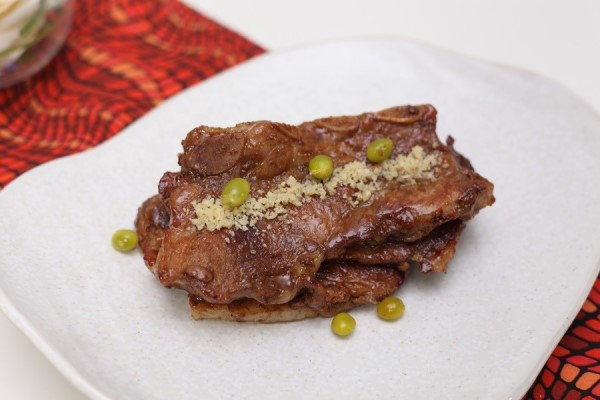

In [45]:
img_num = 1
for idx, col in loaded_temp.iloc[img_num].items():
    print(idx, ':', col)
test = temp['list'][img_num]
test_image = test.reshape(temp['shape'][img_num])
cv2_imshow(test_image)

In [47]:
import json
file_path = "traindata.json"
temp.to_json(file_path, orient="records", lines=True)



In [48]:
loaded_data = []
with open(file_path, "r") as file:
    for line in file:
        loaded_data.append(json.loads(line))

In [49]:
loaded_df = pd.DataFrame(loaded_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



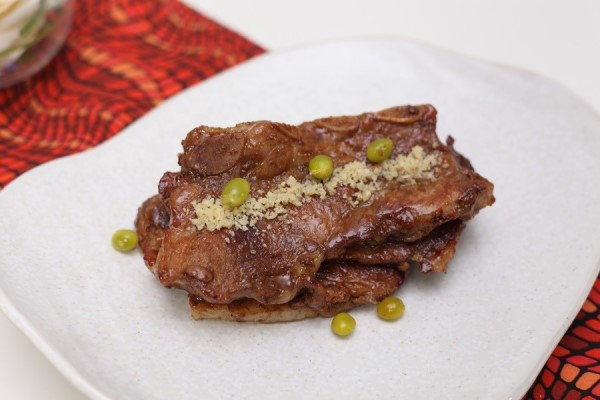

In [50]:
img_num = 1
for idx, col in loaded_df.iloc[img_num].items():
    print(idx, ':', col)
test = temp['list'][img_num]
test_image = test.reshape(temp['shape'][img_num])
cv2_imshow(test_image)